In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
df = pd.read_csv("dataset/Salary_Data.csv")

In [43]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  97 non-null     float64
 1   Salary           97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [45]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [46]:
df.describe()

,YearsExperience,Salary
count,97.000000,97.000000
mean,16.276289,247761.979381
std,8.883292,162884.698623
min,1.100000,37731.000000
25%,8.700000,109431.000000
50%,17.300000,213456.000000
75%,24.000000,376543.000000
max,30.000000,581876.000000


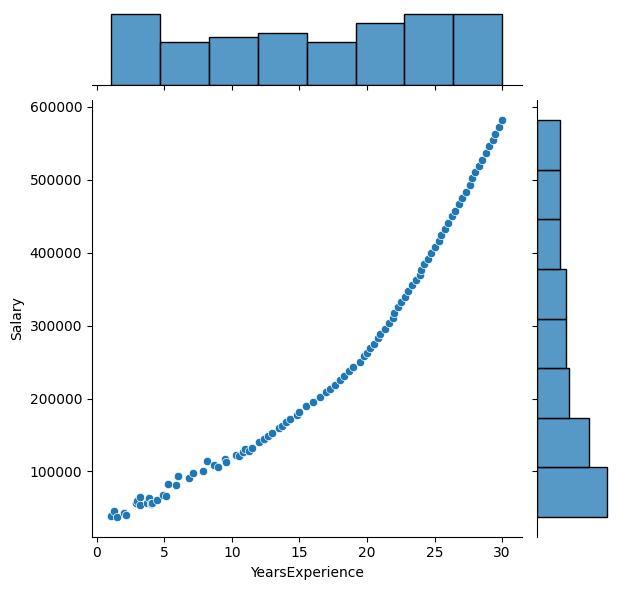

In [47]:
sns.jointplot(x="YearsExperience", y="Salary", data=df)

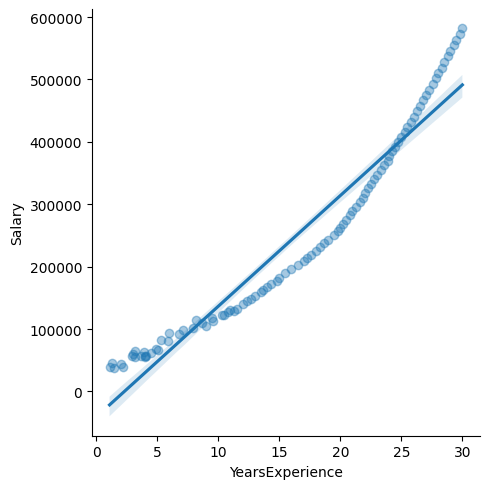

In [48]:
sns.lmplot(x='YearsExperience', y='Salary', data=df, scatter_kws={"alpha": 0.4})

##### Split the dataset

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df[['YearsExperience']]
y = df['Salary']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)
# print(type(X_train))
# print(type(X_test))
# print(type(y_train))
print(y_test)

62    303432.0
40    167432.0
93    554876.0
18     81363.0
81    449876.0
83    466765.0
64    317876.0
42    177234.0
10     63218.0
0      39343.0
31    130765.0
75    399432.0
47    208765.0
26    116969.0
44    189432.0
4      39891.0
22    101302.0
12     56957.0
89    518765.0
73    384765.0
49    218765.0
70    362543.0
68    347543.0
15     67938.0
39    162543.0
33    132765.0
9      57189.0
80    440543.0
11     55794.0
65    325432.0
Name: Salary, dtype: float64


##### Training the model

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression()

In [54]:
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
lm.coef_

array([18001.14464608])

In [56]:
predictions = lm.predict(X_test)

In [57]:
predictions

array([343438.43649504, 206629.7371848 , 482047.25026989,  60820.46555152,
       428043.81633164, 437044.38865468, 350638.89435348, 221030.65290167,
        24818.17625935, -25585.02874969, 152626.30324655, 399241.98489791,
       260633.17112306, 125624.58627742, 233631.45415393,  -5783.76963899,
        96822.75484369,  26618.29072396, 464046.10562381, 390241.41257486,
       271433.85791071, 379440.72578721, 368640.03899956,  42819.32090543,
       201229.39379098, 161626.87556959,  21217.94733013, 422643.47293782,
        26618.29072396, 356039.2377473 ])

Text(0.5, 1.0, 'Evaluation of our LM Model')

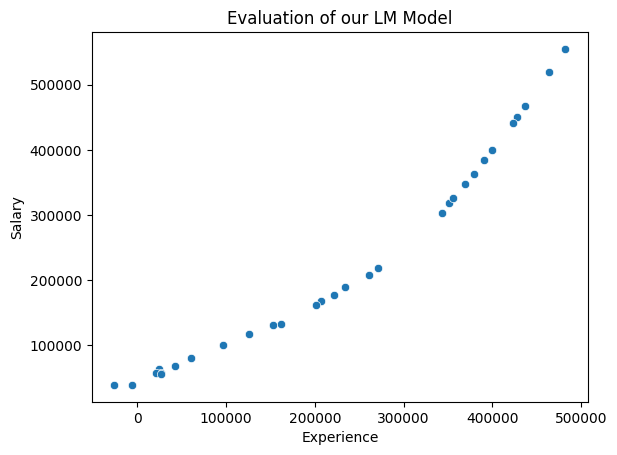

In [58]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Experience")
plt.title("Evaluation of our LM Model")

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [60]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("Root Mean Absolute Error: ", root_mean_squared_error(y_test, predictions))

Mean Absolute Error:  32282.0770483687
Mean Squared Error:  1333995590.9028494
Root Mean Absolute Error:  36523.90437648814


#### Residuals

In [61]:
residuals = y_test - predictions

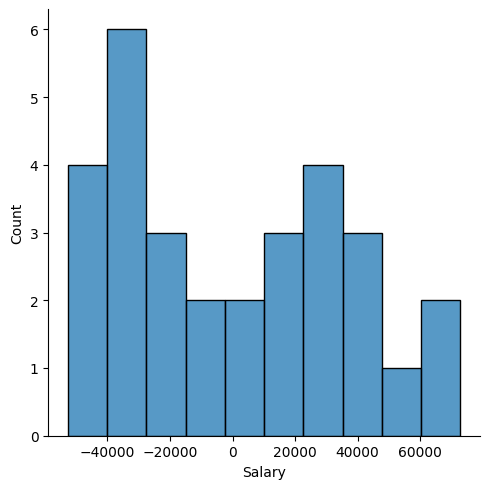

In [63]:
sns.displot(residuals, bins=10)
